# Classification using SVM and ANN

In [1]:
import pandas as pd
import random
import numpy as np
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt

<b> Function for URL feature extraction and dataset preparation

In [2]:
# def clean_html_add_url_flag(data):
#     cleaned_data = []
#     cleaned_flag = []
#     cleaned_url_count = []
#     cleaned_dict = {}
#     for line in data:
#         line = line.lower()
#         soup = BeautifulSoup(line, 'html.parser')
#         url_count = 0
#         url_flag = 0
#         for url in soup.find_all('a'):
#             if url.get('href'):
#                 url_flag = 1
#                 url_count += 1
#             else:
#                 url_flag = 0
#                 url_count = 0
#         clean = re.compile('<.*?>')
#         finish = re.sub(clean, '', line)
#         cleaned_data.append(finish.strip())
#         cleaned_flag.append(url_flag)
#         cleaned_url_count.append(url_count)
#         cleaned_dict['data'] = cleaned_data
#         cleaned_dict['url_count'] = cleaned_url_count
#         cleaned_dict['flag'] = cleaned_flag
#     return cleaned_dict

In [3]:
# def create_dataset(data):
#     cleaned_dict = clean_html_add_url_flag(data)
#     df["data"] = cleaned_dict['data']
#     df["url_count"] = cleaned_dict['url_count']
#     df["flag"] = cleaned_dict['flag']
#     df.to_csv('your paths here', index=False, header=True)

In [4]:
# create_dataset(body)

# SVM Classifier

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import svm
import matplotlib.pyplot as plt

In [6]:
df_new = pd.read_csv("dataset_medium.csv")
df_new

,label,body_text,label_num,data,url_count,flag
0,phishing,"<style type=""text/css"">\n<!--\n.style1 {\n\tfo...",1,"<!--\n.style1 {\n\tfont-family: verdana, arial...",8,1
1,phishing,\n<html>\n\n\n\n\n\n\n\n<head>\n\n\n\n<meta ht...,1,new page 1\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n.dum...,4,1
2,phishing,DIGITAL HOME DVD\n\nPROMOCION DVD JUNIO !!!\n_...,1,digital home dvd\n\npromocion dvd junio !!!\n_...,0,0
3,phishing,"<html xmlns:v=""urn:schemas-microsoft-com:vml""\...",1,"<html xmlns:v=""urn:schemas-microsoft-com:vml""\...",1,1
4,phishing,"<html>\n\n<head>\n<meta http-equiv=""Content-La...",1,7500 planos y diseï¿½os - casas y cabaï¿½as 20...,2,1
...,...,...,...,...,...,...
493,ham,"Subject: cera conference call - tuesday , janu...",0,"subject: cera conference call - tuesday , janu...",0,0
494,ham,"Subject: bob lee ' s bio vince , here ' s bo...",0,"subject: bob lee ' s bio vince , here ' s bo...",0,0
495,ham,Subject: re : london contact number hi anita ...,0,subject: re : london contact number hi anita ...,0,0
496,ham,Subject: re : the garp 2001 convention andrea...,0,subject: re : the garp 2001 convention andrea...,0,0


In [7]:
cv = CountVectorizer(max_features=35000, min_df=1)

In [8]:
df_new.drop(['label'], 1, inplace=True)  # not relevant columns
df_new['body_text'] = cv.fit_transform(df_new['body_text'].values.astype('U')).toarray()
df_new['data'] = cv.fit_transform(df_new['data'].values.astype('U')).toarray()
df_new.columns

Index(['body_text', 'label_num', 'data', 'url_count', 'flag'], dtype='object')

In [9]:
df_new['data']

0      0
1      0
2      0
3      0
4      0
      ..
493    1
494    0
495    1
496    0
497    0
Name: data, Length: 498, dtype: int64

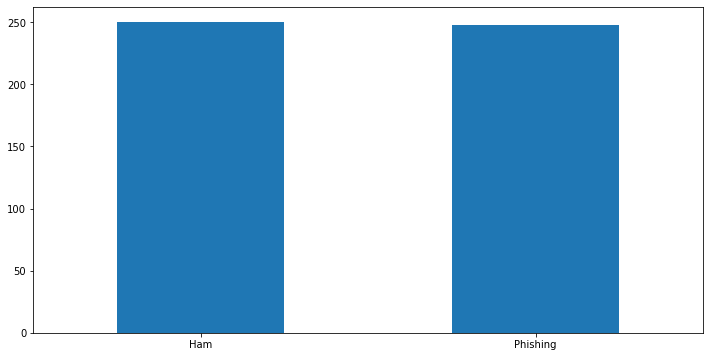

In [10]:
df_new["label_num"].value_counts().plot(kind="bar", figsize=(12,6))
plt.xticks(np.arange(2), ('Ham', 'Phishing'), rotation=0)
plt.show()

In [11]:
X = np.array(df_new.drop(['label_num', 'body_text'], 1), dtype=int)
y = np.array(df_new['label_num'])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [13]:
model = svm.SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [14]:
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test, y_pred)
print(cm, score*100)

[[47  0]
 [ 5 48]] 95.0


# ANN Classifier

In [15]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras.layers import Dense

In [16]:
dataset = df_new.values
X = dataset[:, 1:2]
X = X.reshape(-1, 1)
y = dataset[:, 0]

In [17]:
# scale the data
# scales the dataset so that all the input features lie between 0 and 1 inclusive
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(X)

In [18]:
x_train, x_val_test, y_train, y_val_test = train_test_split(x_scale, y, test_size=0.2)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test)
print(x_train.shape, x_test.shape, x_val.shape, y_train.shape, y_test.shape, y_val.shape)

(398, 1) (25, 1) (75, 1) (398,) (25,) (75,)


In [19]:
# first layer as a dense layer with 32 neurons, input_shape = # of features

# model = Sequential([Dense(32, activation='relu', input_shape=(2,)), Dense(32, activation='relu'), Dense(1, activation='sigmoid'),])
model = Sequential([Dense(32, activation='relu', input_shape=(1,)), Dense(32, activation='relu'), Dense(1, activation='sigmoid'),])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
13/13 [==============================] - 0s 499us/step - loss: 0.6887 - accuracy: 0.5653
Epoch 2/10
13/13 [==============================] - 0s 415us/step - loss: 0.6526 - accuracy: 0.8668
Epoch 3/10
13/13 [==============================] - 0s 416us/step - loss: 0.6259 - accuracy: 0.8668
Epoch 4/10
13/13 [==============================] - 0s 499us/step - loss: 0.6066 - accuracy: 0.8668
Epoch 5/10
13/13 [==============================] - 0s 499us/step - loss: 0.5950 - accuracy: 0.8668
Epoch 6/10
13/13 [==============================] - 0s 499us/step - loss: 0.5866 - accuracy: 0.8668
Epoch 7/10
13/13 [==============================] - 0s 416us/step - loss: 0.5839 - accuracy: 0.8668
Epoch 8/10
13/13 [==============================] - 0s 499us/step - loss: 0.5817 - accuracy: 0.8668
Epoch 9/10
13/13 [==============================] - 0s 499us/step - loss: 0.5807 - accuracy: 0.8668
Epoch 10/10
13/13 [==============================] - 0s 499us/step - loss: 0.5800 - accuracy: 0.8668

In [20]:
evalu = model.evaluate(x_test, y_test)[1]
print("Accuracy: " + str(evalu))

1/1 [==============================] - 0s 77ms/step - loss: 0.5474 - accuracy: 0.8400
Accuracy: 0.8399999737739563
